In [1]:
# These are optional and for Google colab
# Sometimes the instance deletes all data and so this needs to be run again
# ! git clone https://github.com/dave31415/restyle.git
# % cd restyle
# !git pull

In [2]:
import torch
from restyle.pipeline import get_params, upload_images, load_content_image, load_style_image, run

In [3]:
"""upload the images if on Google Colab, otherwise expects to find content.png and style.png in root dir"""
upload_images()


Not running on CoLab, using existing content, style files


In [4]:
# get parameters, can change any variables (printed below) with keywords
params = get_params()


params
--------------
n_iter: 100
image_width: 128
image_height: 128
content_weight: 1.0
style_weight: 1.0
total_variation_weight: 10.0
input_image: hybrid
content_layers: ['conv_1', 'conv_2', 'conv_4']
style_layers: ['conv_2', 'conv_3', 'conv_4', 'conv_7', 'conv_10', 'conv_8']
content_image_path: content.png
style_image_path: style.png
output_image_path: result.png
combined_image_path: combined.png
style_file: style.png
content_file: content.png
plot_y_range: (0.5, 10000)
hybrid_weight_content: 0.9
hybrid_weight_style: 0.0
show_image_interval: 50
initial_seed: 420
--------------



In [5]:
# get the content image
content_image, original_content_image_size = load_content_image(params)

Original content image size (998, 994)
Saving content image
resizing
Resized content imaged sixze (128, 128)


In [6]:
# get the style image
style_image = load_style_image(params)

Style image size (994, 990)
Saving style image
resizing
Resized style imaged size (128, 128)


In [7]:
# get the device, cpu or gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device: %s' % device)

device: cpu


Building the style transfer model..


/Users/david/PycharmProjects/restyle/restyle/pipeline.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/Users/david/PycharmProjects/restyle/restyle/pipeline.py:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)
/Users/david/PycharmProjects/restyle/venv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size,

Optimizing..


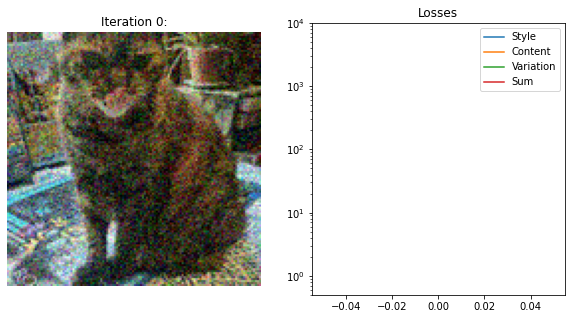

Iter: 0, Style Loss : 28883.660156 Content Loss: 8.919307 Variation Loss: 1.086368 Sum: 28893.666016


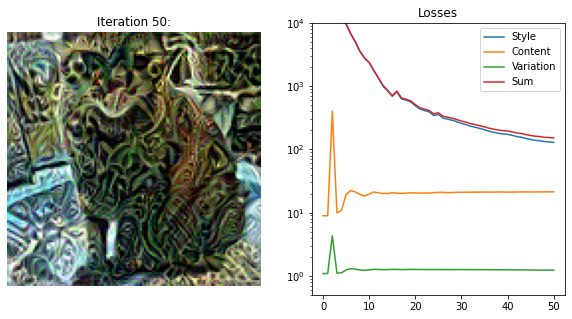

Iter: 50, Style Loss : 129.107422 Content Loss: 21.309216 Variation Loss: 1.229377 Sum: 151.646011


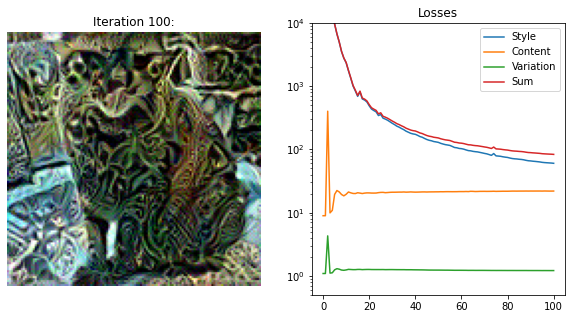

Iter: 100, Style Loss : 60.234966 Content Loss: 21.916342 Variation Loss: 1.208817 Sum: 83.360123
Runtime: 0.97 minutes
final image size:  (998, 994)
All done


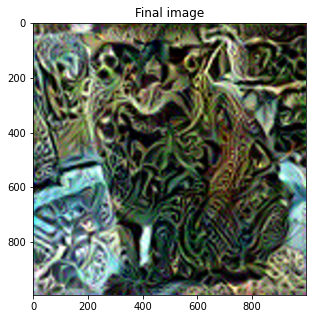

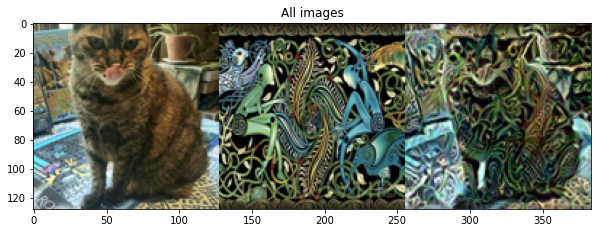

In [8]:
# run the style transfer process
run(params, content_image, style_image, device, original_content_image_size)